In [9]:
# Tutorials
# https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis
# https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
#
# Video - https://www.youtube.com/watch?v=JtUAAXe_0VI
# Comments scrapper - https://github.com/egbertbouman/youtube-comment-downloader

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from wordcloud import WordCloud,STOPWORDS # for building wordclouds
from textblob import TextBlob # for analyzing the comments for sentiments
import matplotlib.pyplot as plt # for plotting wordcloud
%matplotlib inline

In [11]:
# reading the data scraped by the youtube-comment-downloader
# $ python3 downloader.py -y JtUAAXe_0VI -o data.json
data = pd.read_json("Kurzgesagt_comments.json", lines=True)

In [12]:
# Keeping only the comments columns
data = data[['text']]

In [13]:
# checking the number of comments
print('Number of rows: ' + str(data.shape[0]) + '\nNumber of columns: ' + str(data.shape[1]))

Number of rows: 11757
Number of columns: 1


In [14]:
# adding a list to store the analysis from textblob about the sentiment of the comment
sentiment = []

In [15]:
# letting textblob work its magic
for index, text in data.iterrows():
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0: 
            sentiment.append('positive')
    elif analysis.sentiment.polarity == 0: 
            sentiment.append('neutral')
    else: 
            sentiment.append('negative')

In [16]:
# disabling SettingWithCopyWarning since we explicitly want to overwrite the dataframe 
pd.options.mode.chained_assignment = None

# adding sentiment to the dataframe
data['sentiment'] = sentiment

In [17]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "neutral"]

Positive words


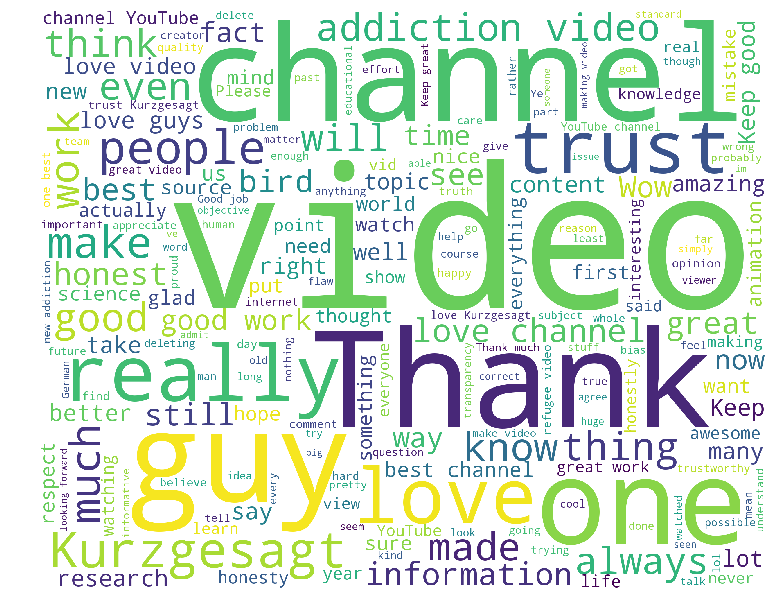

Negative words


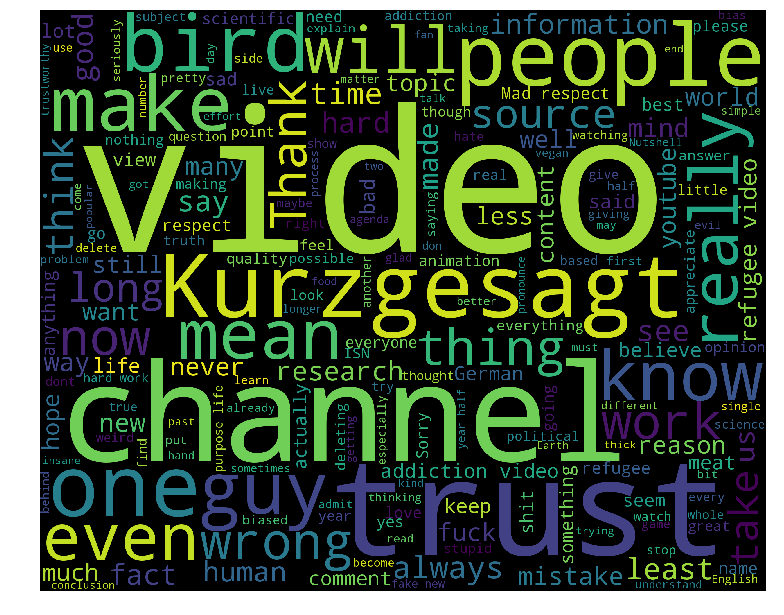

In [18]:
train_pos = train[ train['sentiment'] == 'positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)